# **Problem statement**


We want to know what increases the sales, by exploring
the properties of the products and the stores.



#  **Hypothesis generation based on two factors:**

*   Product features
*   Store features

a) Product features :


*   Cost of the product
*   Quality of the product
*   importance of the product(essential or not)
*   Revenue of the product

b) Store features :


*   Store location  : the further the store, the less will be the sales
*   State of the store : if the store is new,then people will tend to buy from it
*   Customer service: if the sales team is not good enough at selling and convincing the customer, the sales will decrease.Also the number of people in the crew matters, if there are few then the sales will decrease
* Store size: as the size of the store increases, the number of the products will increase also the variety of the products, so the more will be the sales.
*   The store opening hours: As the opening hours increase , the sales will be more. Also, the opening hours must be appropiate to the customers.
*   Marketing campaigns for the store: if the store makes good marketing campaigns, online or offline, then more people will know about the store.
*   The delivery service: the store with a delivery service sales more than the store with no delivery.
*   Discounts and offers: to make more sales, the store must make offers and discounts on the products
*   Variety of payment options: Does this store provide various payment options as credit card, VISA, mastercard not only cash?
*  Providing a money-back guarantee: this makes people buy more from this store

*   Store tier : Tier 1 cities are highly developed , Tier 2 cities are still developing their real estate markets, and Tier 3 cities have underdeveloped markets.





#**Importing libraries and reading data**





##Importing libraries

In [57]:
#preprocessing and feature engineering
import pandas as pd
import scipy
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#for visulaization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import *

#for modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

##Reading the data

In [58]:
df = pd.read_csv('Train.csv')

#**Exploring the dataset**

In [59]:
df.shape


(8523, 12)

We now know the shape of the data, it contains 8523 rows and 12 columns.
Now let's explore the columns of the data by looking at the first 10 entries

In [60]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


##Explaining the columns:

**A) Item features:**

1) Item_Identifier : the product id.

2) Item_Weight : the weight of the product.

3) Item_Fat_Content : the fat percentage in the product.

4) Item_Visibility : the ability for shoppers to discover, identify, and engage with products.

5) Item_Type : the type of the product.

6) Item_MRP	: marginal revenue product, calculated by dividing the total revenue by the amount of goods.

**B) Store features:**

7) Outlet_Identifier : the store id.

8) 	Outlet_Establishment_Year : the year in which the store is opened.

9) Outlet_Size	: the size of the store.

10) Outlet_Location_Type: the tier of the store city.

11) Outlet_Type : the store type.

12) Item_Outlet_Sales : the sales of the store from the product, our target.







#**Data Preprocessing**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see that Item_Weight and Outlet_Size columns have nulls so we must get rid of these nulls, we have several ways to replace null values but we will choose to replace nulls in Item_Weight column by the mean
 or the median because its values are numerical, and replace the nulls in Outlet_Size by the mode because it is categorical, but first let us decide how we will replace nulls in Item_Weight (with mean or median?)

<Axes: title={'center': 'Distribution of weight'}, xlabel='Item_Weight', ylabel='Density'>

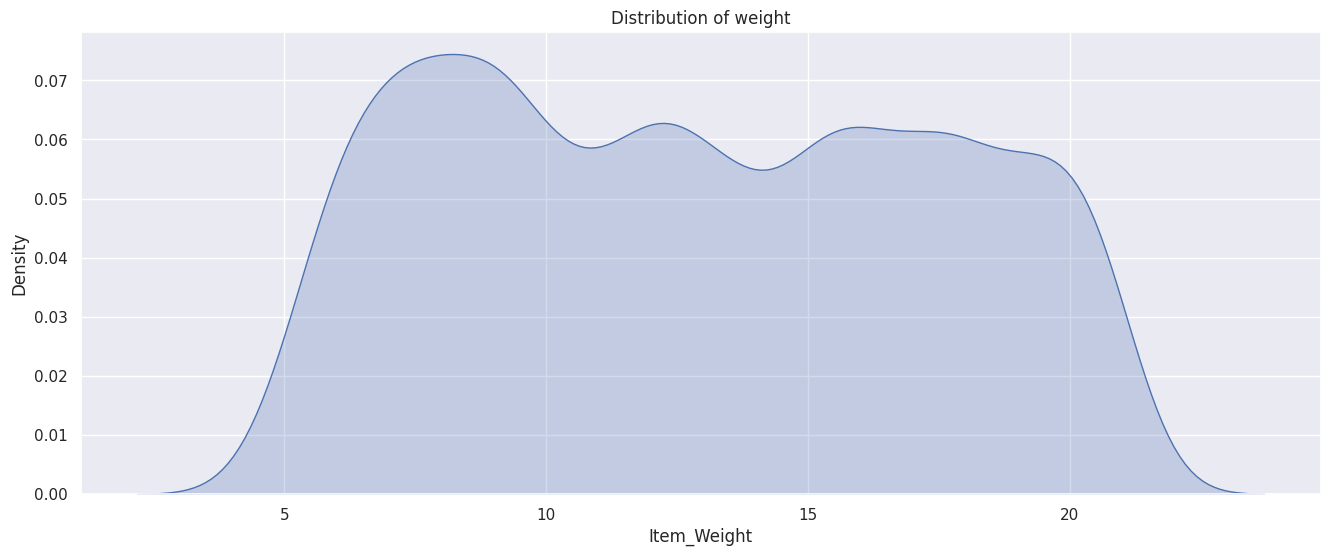

In [62]:
plt.figure(figsize = (16, 6))
plt.title("Distribution of weight")
sns.kdeplot(data = df['Item_Weight'], fill = True)

The graph shows that the weight is normally distributed (no extreme outliers) so we can replace the nulls with mean(because the mean is affected by outliers).

In [63]:
#replacing nulls in Item_Weight by the mean
mean_value=df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=mean_value, inplace=True)

In [64]:
#replacing nulls in Outlet_Size by the mode
mode_value=df.Outlet_Size.mode()[0]
df['Outlet_Size'].fillna(value=mode_value, inplace=True)

In [65]:
#checking the data after replacing the nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
#checking on the unique values of categorical data
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


As observed, the Item_Fat_Content values are not unique, so we want to make its values(low fat, Regular) only.

In [67]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF'], 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat'], 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')


In [68]:
#looking at the new unique values
print(df['Item_Fat_Content'].unique())

['low fat' 'Regular']


In [69]:
#check on duplicate values
df.duplicated().sum()

0

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


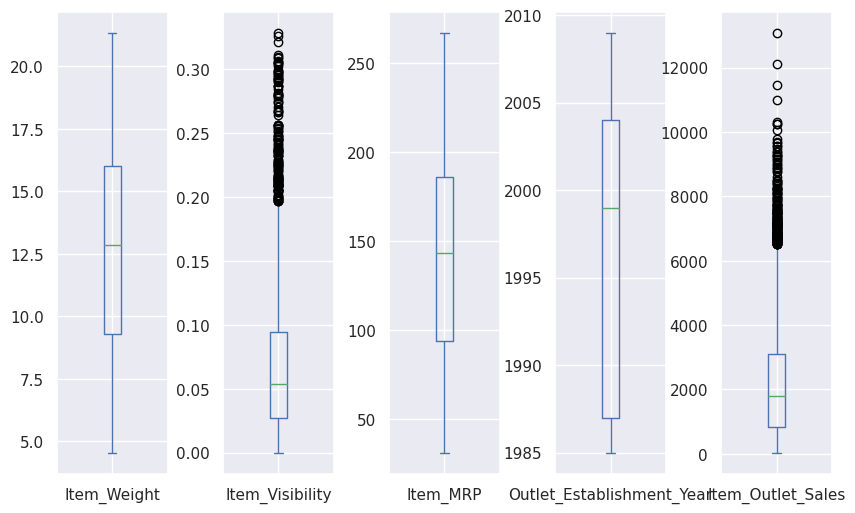

In [71]:
#visulalizing outliers by box plots
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()


In [72]:
#function to replace outliers with the max value possible without missing the data :)
def outliers(dataset,col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(dataset)):
      if dataset[col].iloc[i] > upper_bound:
          dataset[col].iloc[i] = upper_bound
      if dataset[col].iloc[i] < lower_bound:
          dataset[col].iloc[i] = lower_bound
#replacing the outliers using the function (On trying we saw that replacing the outliers of these features gives us the best accuracy for us)
outliers(df,'Item_Visibility')
outliers(df,'Item_Outlet_Sales')




<ipython-input-72-fe9e6a6ee232>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col].iloc[i] = upper_bound
<ipython-input-72-fe9e6a6ee232>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col].iloc[i] = upper_bound


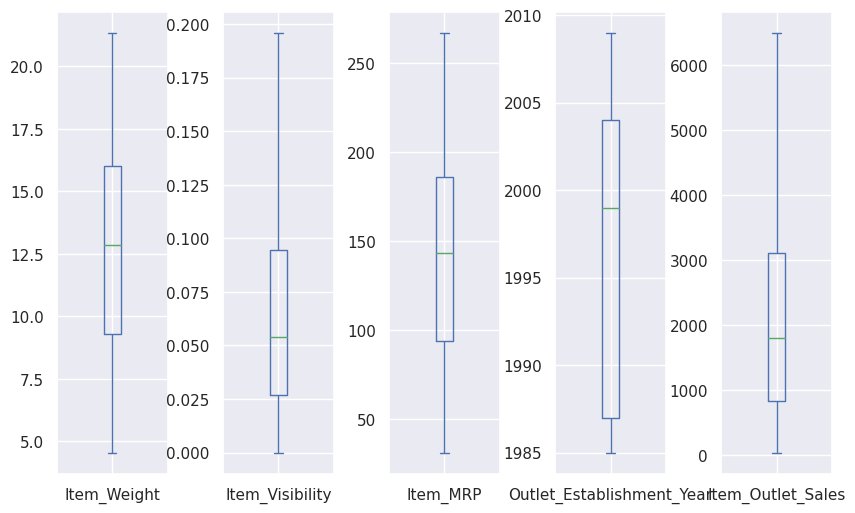

In [73]:
#visulalizing box plots with removed outliers
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()


Now, let's see the relation between each numerical feature and our target(Item_Outlet_Sales).

<ipython-input-74-d6fb8c2bf61c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-74-d6fb8c2bf61c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt= '.2f')


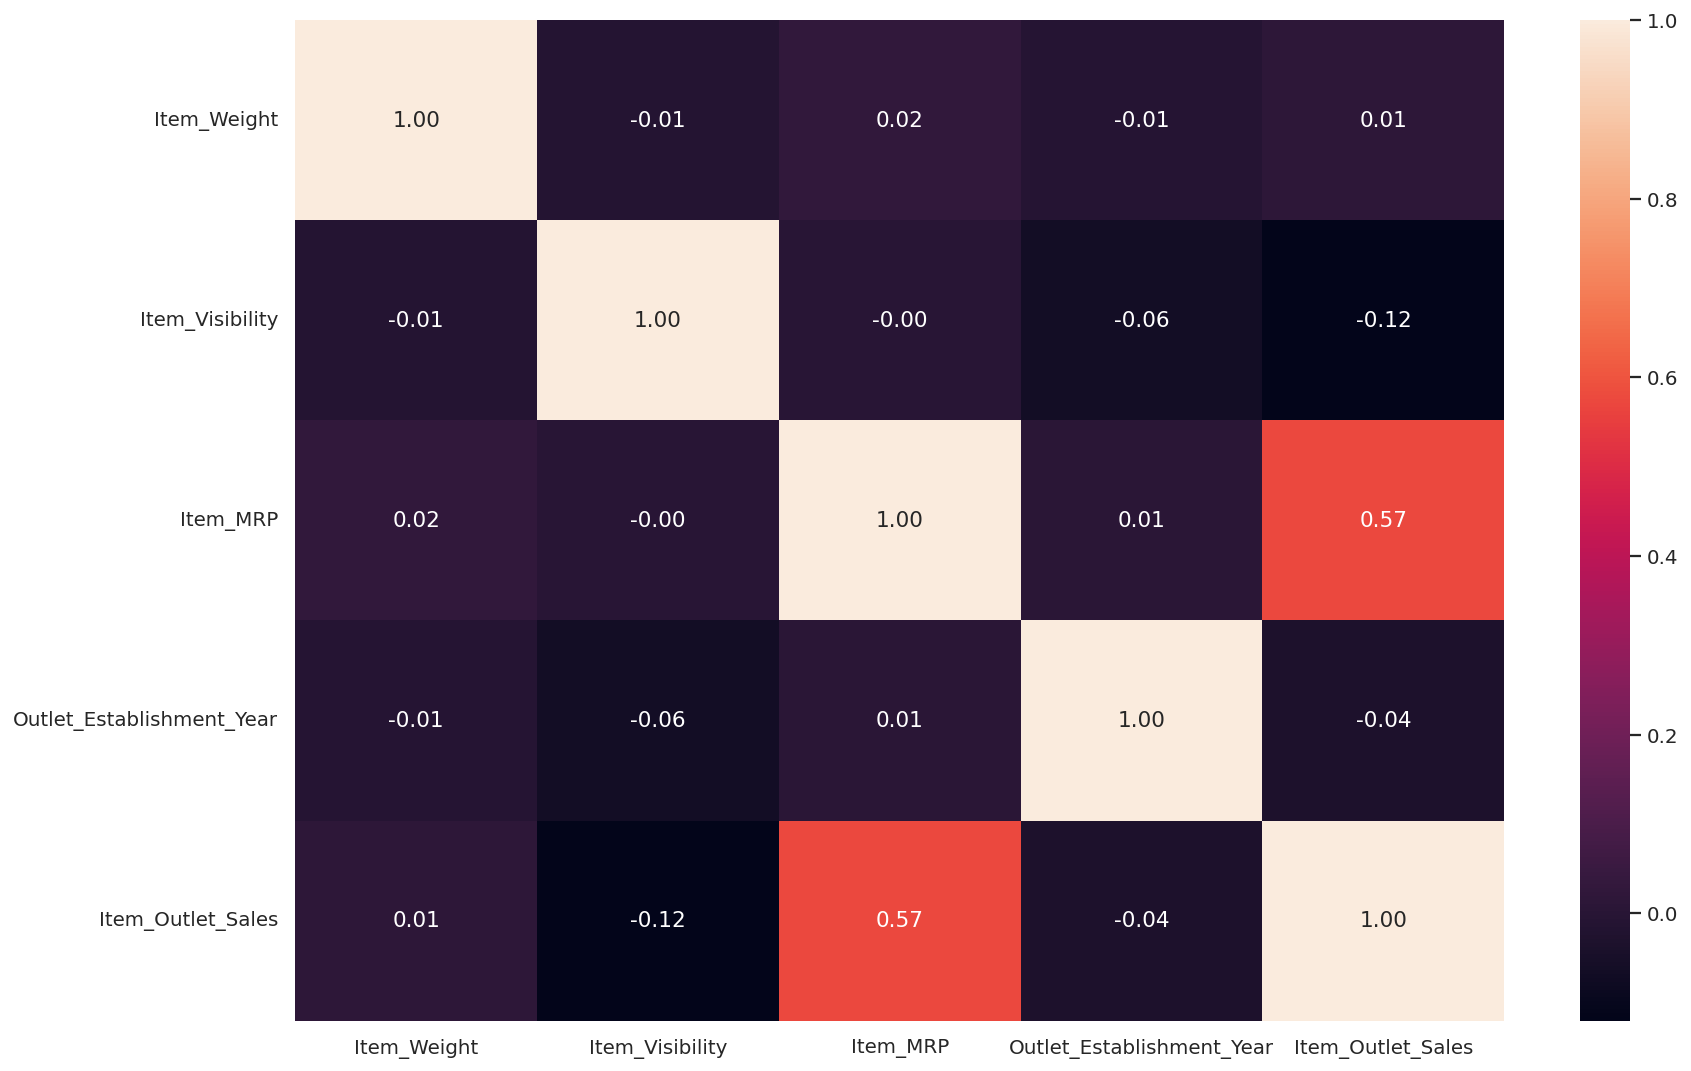

In [74]:
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

As you can observe, there is almost a strong relationsip between sales and MRP also sales and item visibility

#**Univariate Analysis**

(array([5517.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3006.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

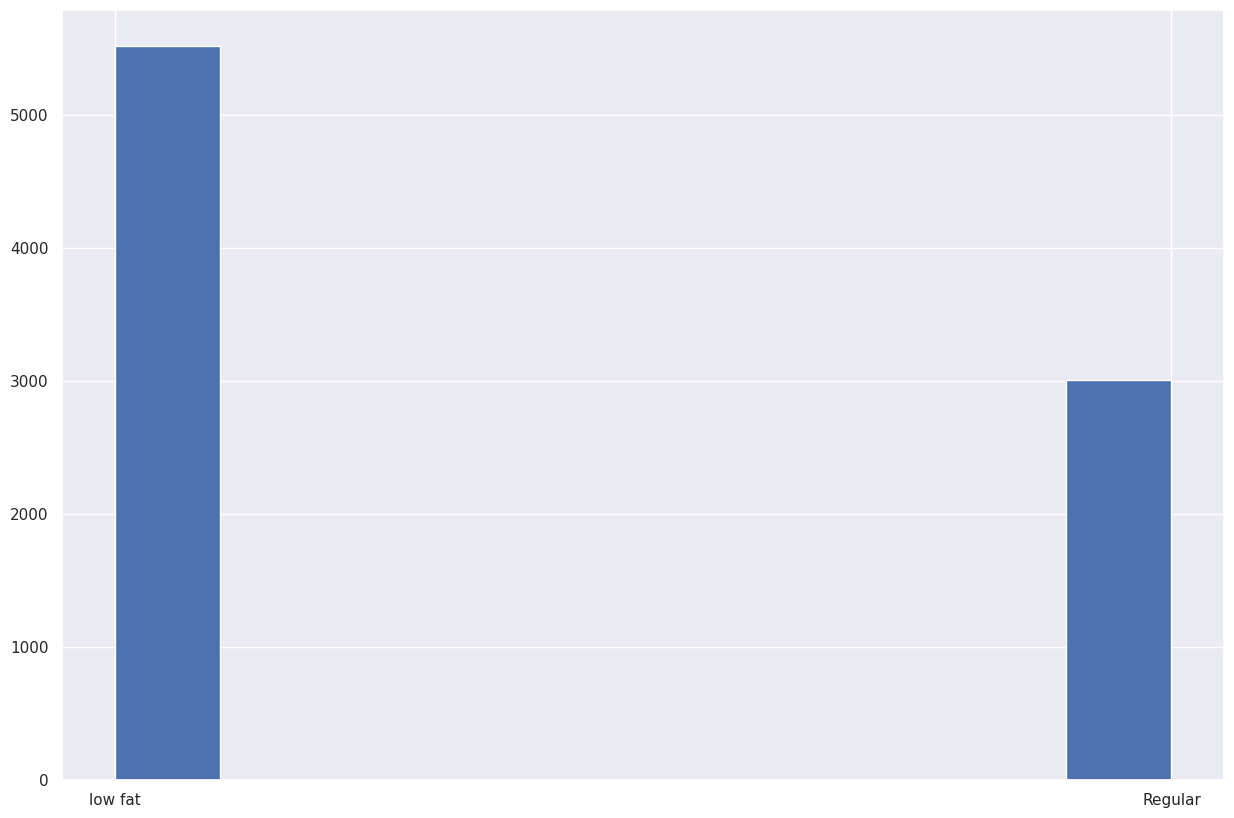

In [75]:
plt.hist(df['Item_Fat_Content'])

Low fat products are much more than the regular fat products

(array([ 682.,  445.,  425., 1232.,  910.,  648., 1200.,  856.,  110.,
         520.,  214.,  649.,  251.,  148.,  169.,   64.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

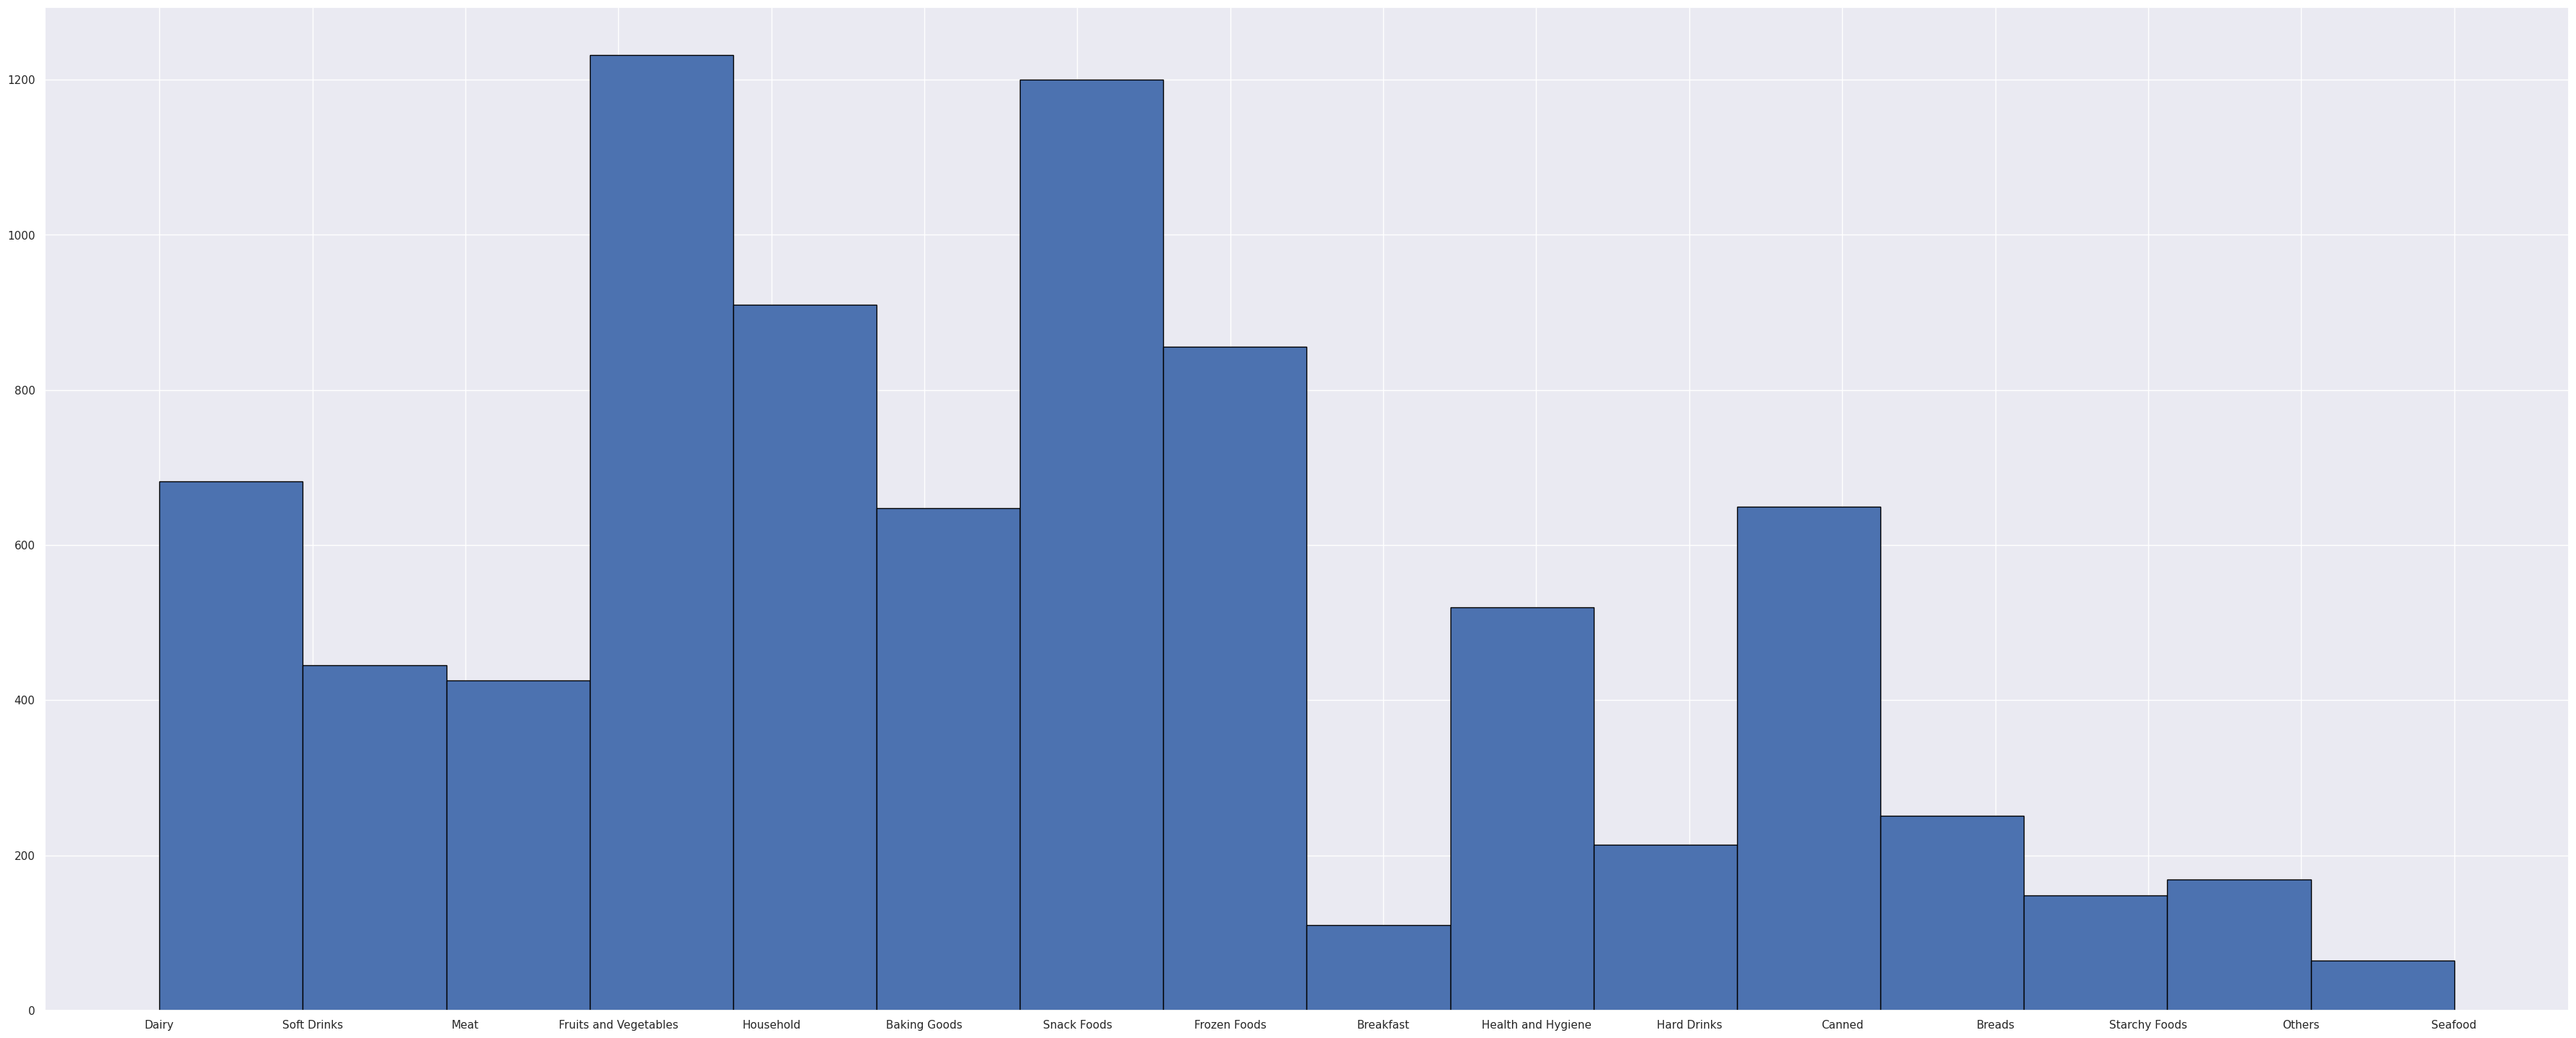

In [76]:
plt.figure(figsize=(45,18))
plt.hist(df['Item_Type'], edgecolor='black', bins=16)

We can observe that Fruits and vegetables and snack foods are the majority in the data and seafood is the least.

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

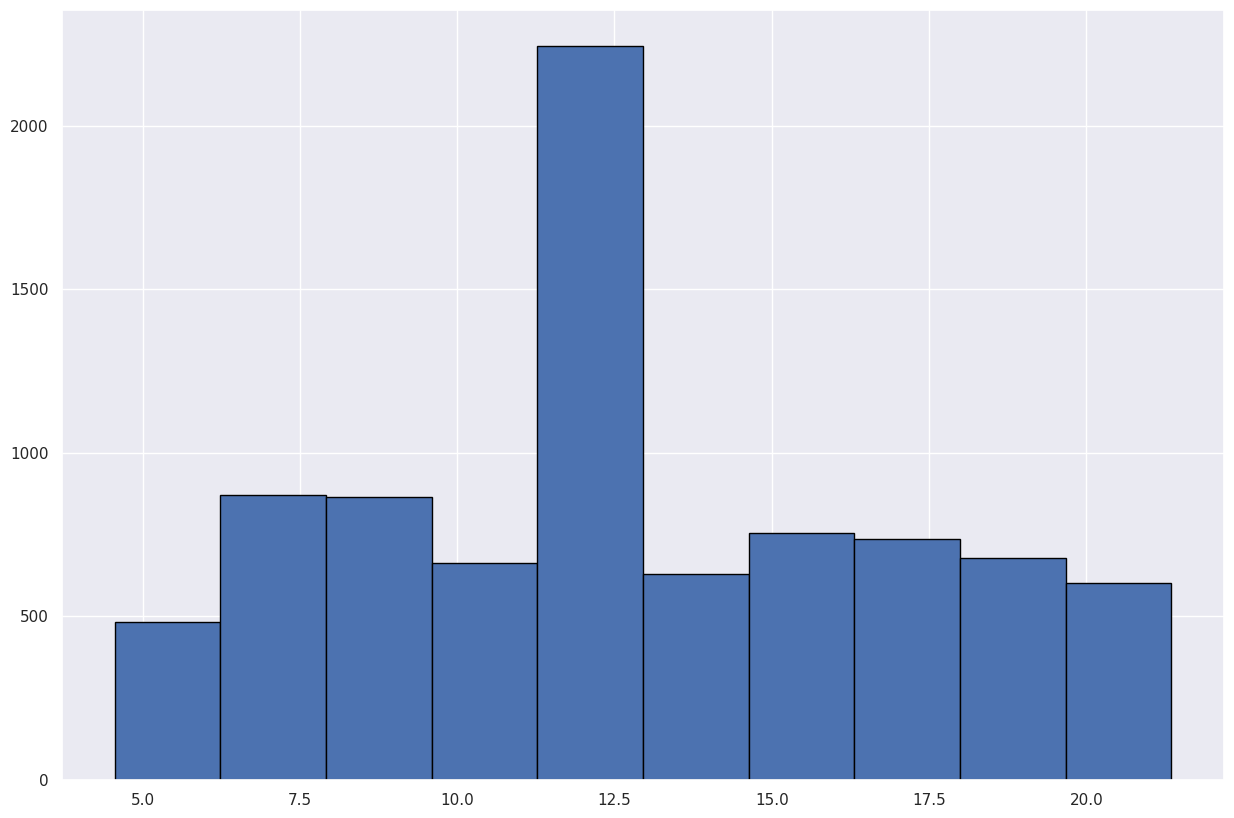

In [77]:
plt.hist(df['Item_Weight'], edgecolor='black')

It is obvious that the majority products in the data have weight between 10 and 15(medium).

(array([1453., 1755., 1386., 1107.,  818.,  597.,  509.,  343.,  299.,
         256.]),
 array([0.        , 0.0195979 , 0.0391958 , 0.0587937 , 0.07839161,
        0.09798951, 0.11758741, 0.13718531, 0.15678321, 0.17638111,
        0.19597902]),
 <BarContainer object of 10 artists>)

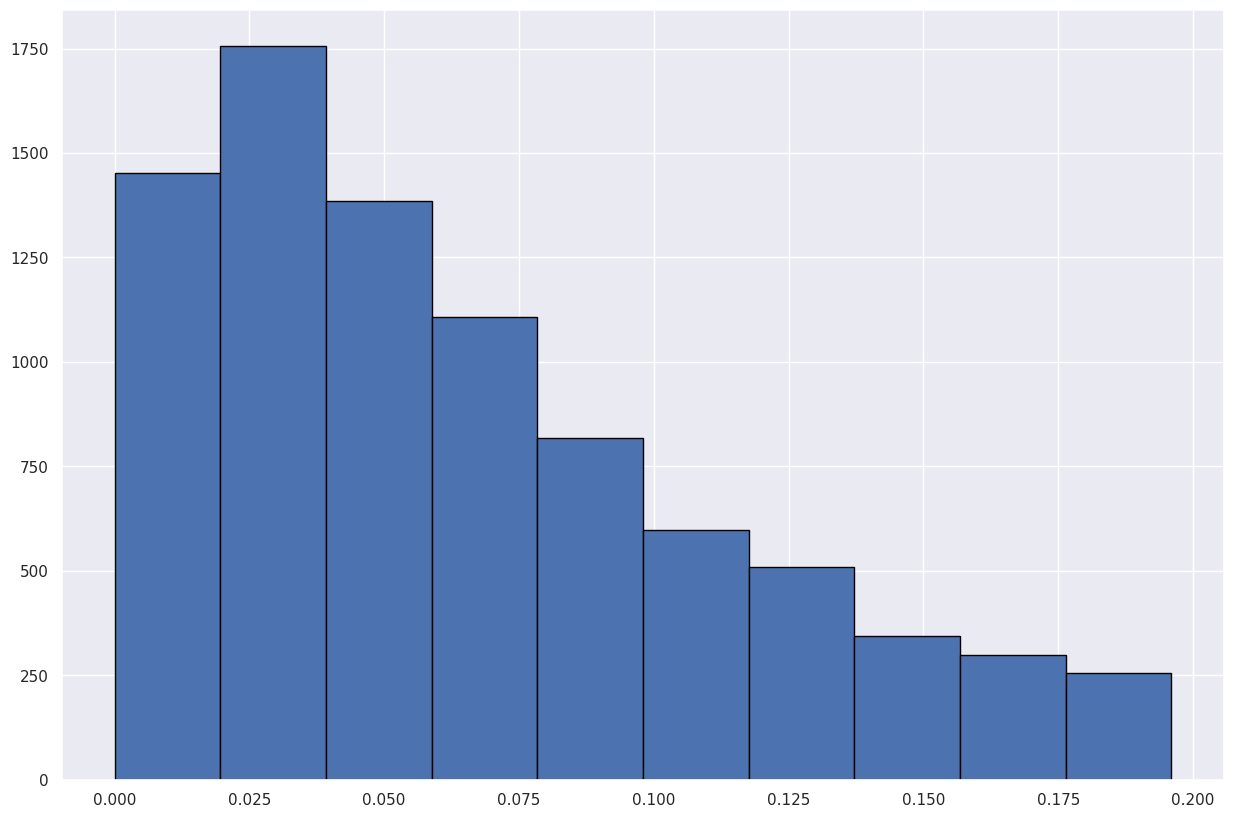

In [78]:
plt.hist(df['Item_Visibility'], edgecolor='black')

Items with lower visibility are more than that with the higher visibility, this indicates that in order to increase the item visibility, the store must provide more money, to make the item more visible (for example, by ads), so that's why items with higher visibility are few in the data.

(array([5203.,    0.,    0.,    0.,    0.,  932.,    0.,    0.,    0.,
        2388.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

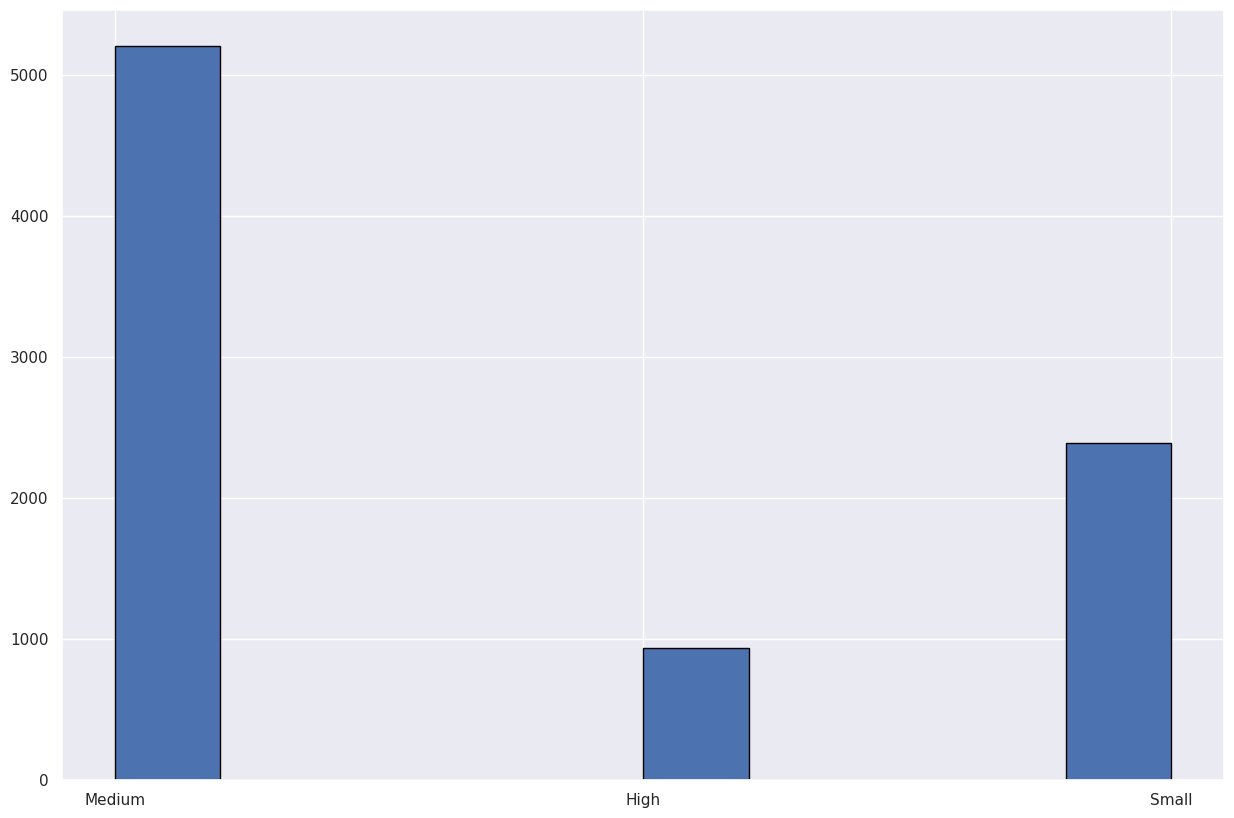

In [79]:
plt.hist(df['Outlet_Size'], edgecolor='black')

The previous graph indicates that medium is the common size in stores.

(array([5577.,  928., 1083.,  935.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

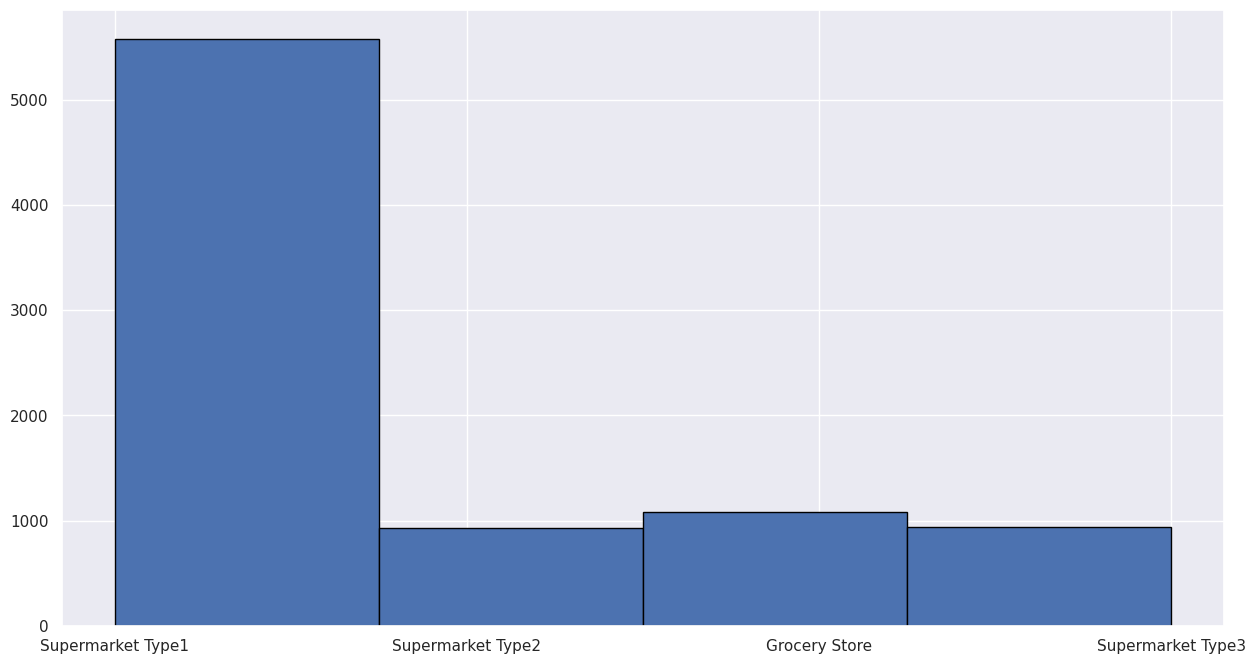

In [80]:
plt.figure(figsize=(15,8))
plt.hist(df['Outlet_Type'], edgecolor='black', bins = 4)

This indicates that supermarket type1 sells a lot of items more than the other stores.

#**Bivariate Analysis**

Text(0, 0.5, 'sales')

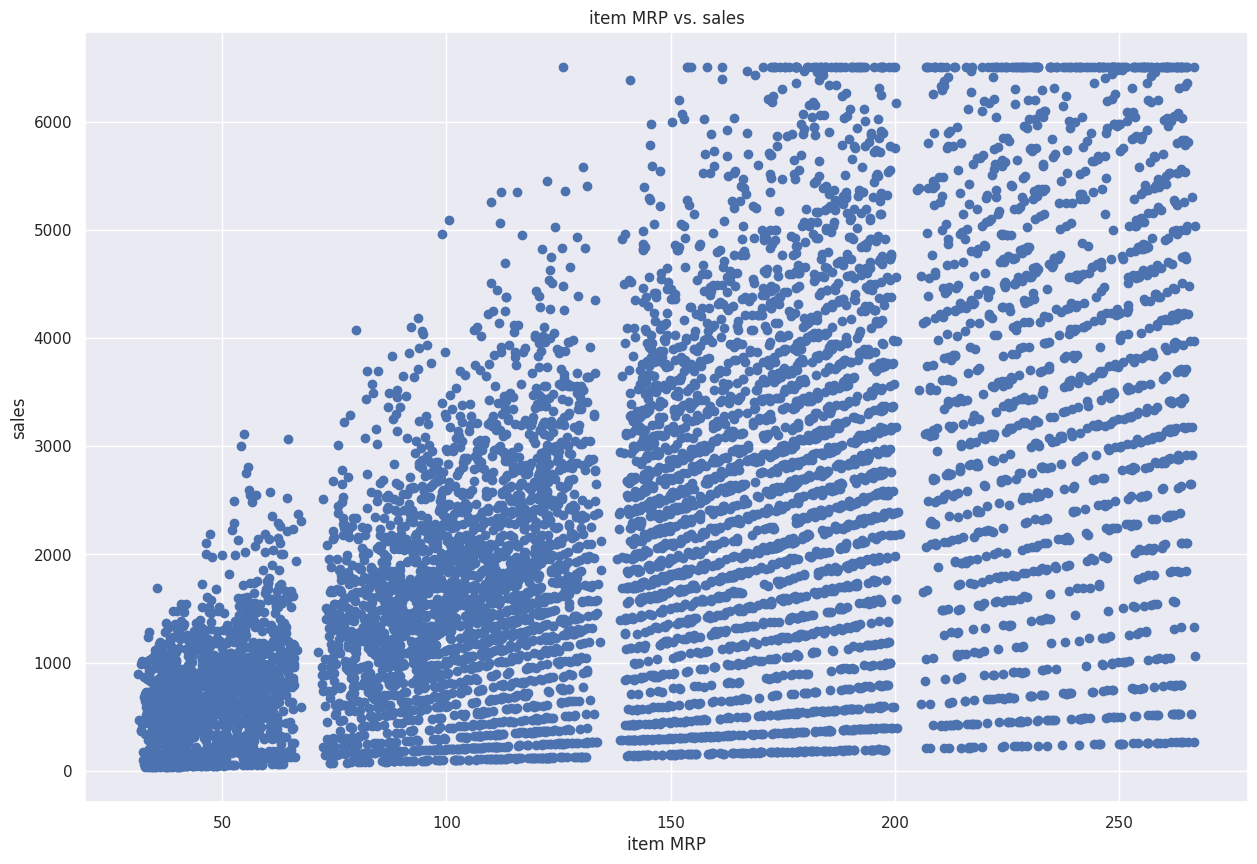

In [81]:
plt.scatter(df.Item_MRP, df.Item_Outlet_Sales)
plt.title('item MRP vs. sales')
plt.xlabel('item MRP')
plt.ylabel('sales')

The previous graph assured that there is a strong relationship between item MRP and outlet_item sales!

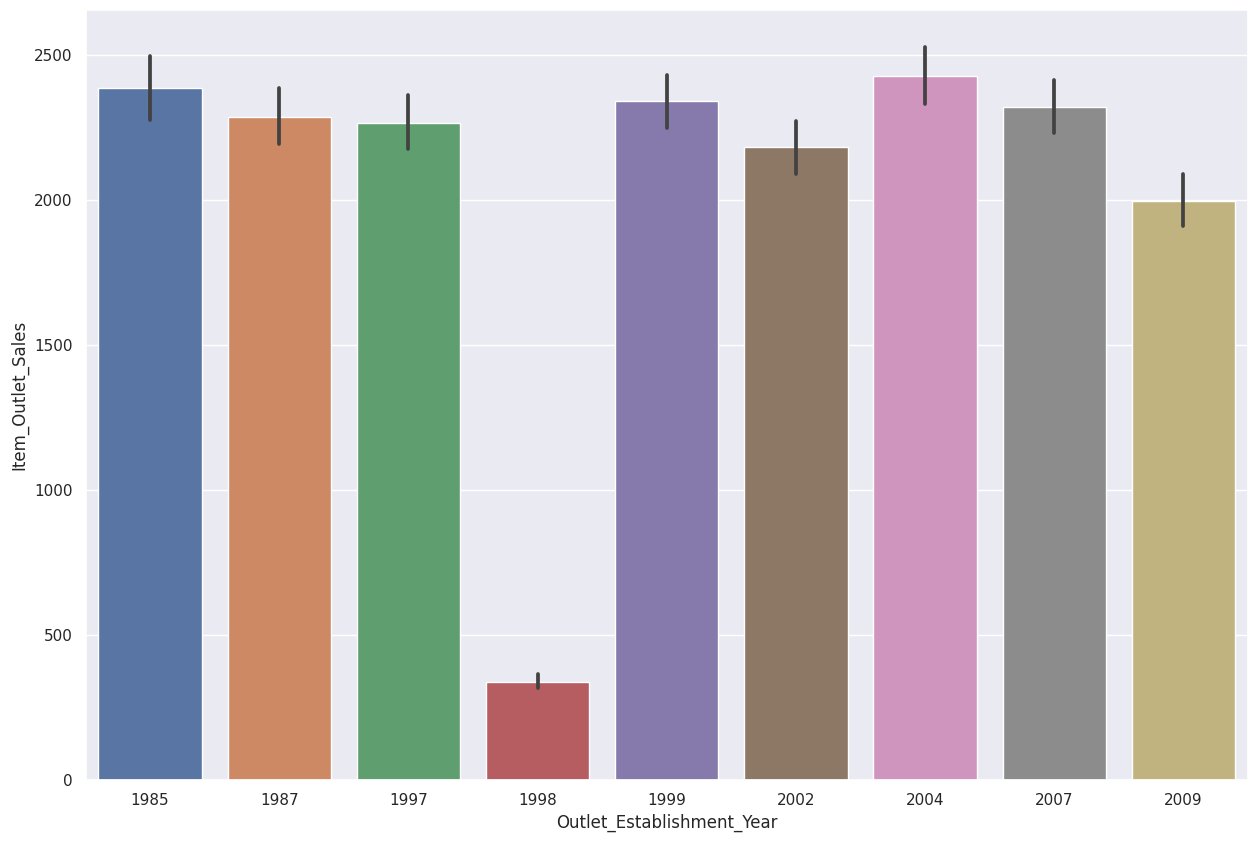

In [82]:
sns.barplot(x = 'Outlet_Establishment_Year',y = 'Item_Outlet_Sales',data = df)
plt.show()

That bar plot shows that lowest sales are in the outlets established between 1995 and 2000.

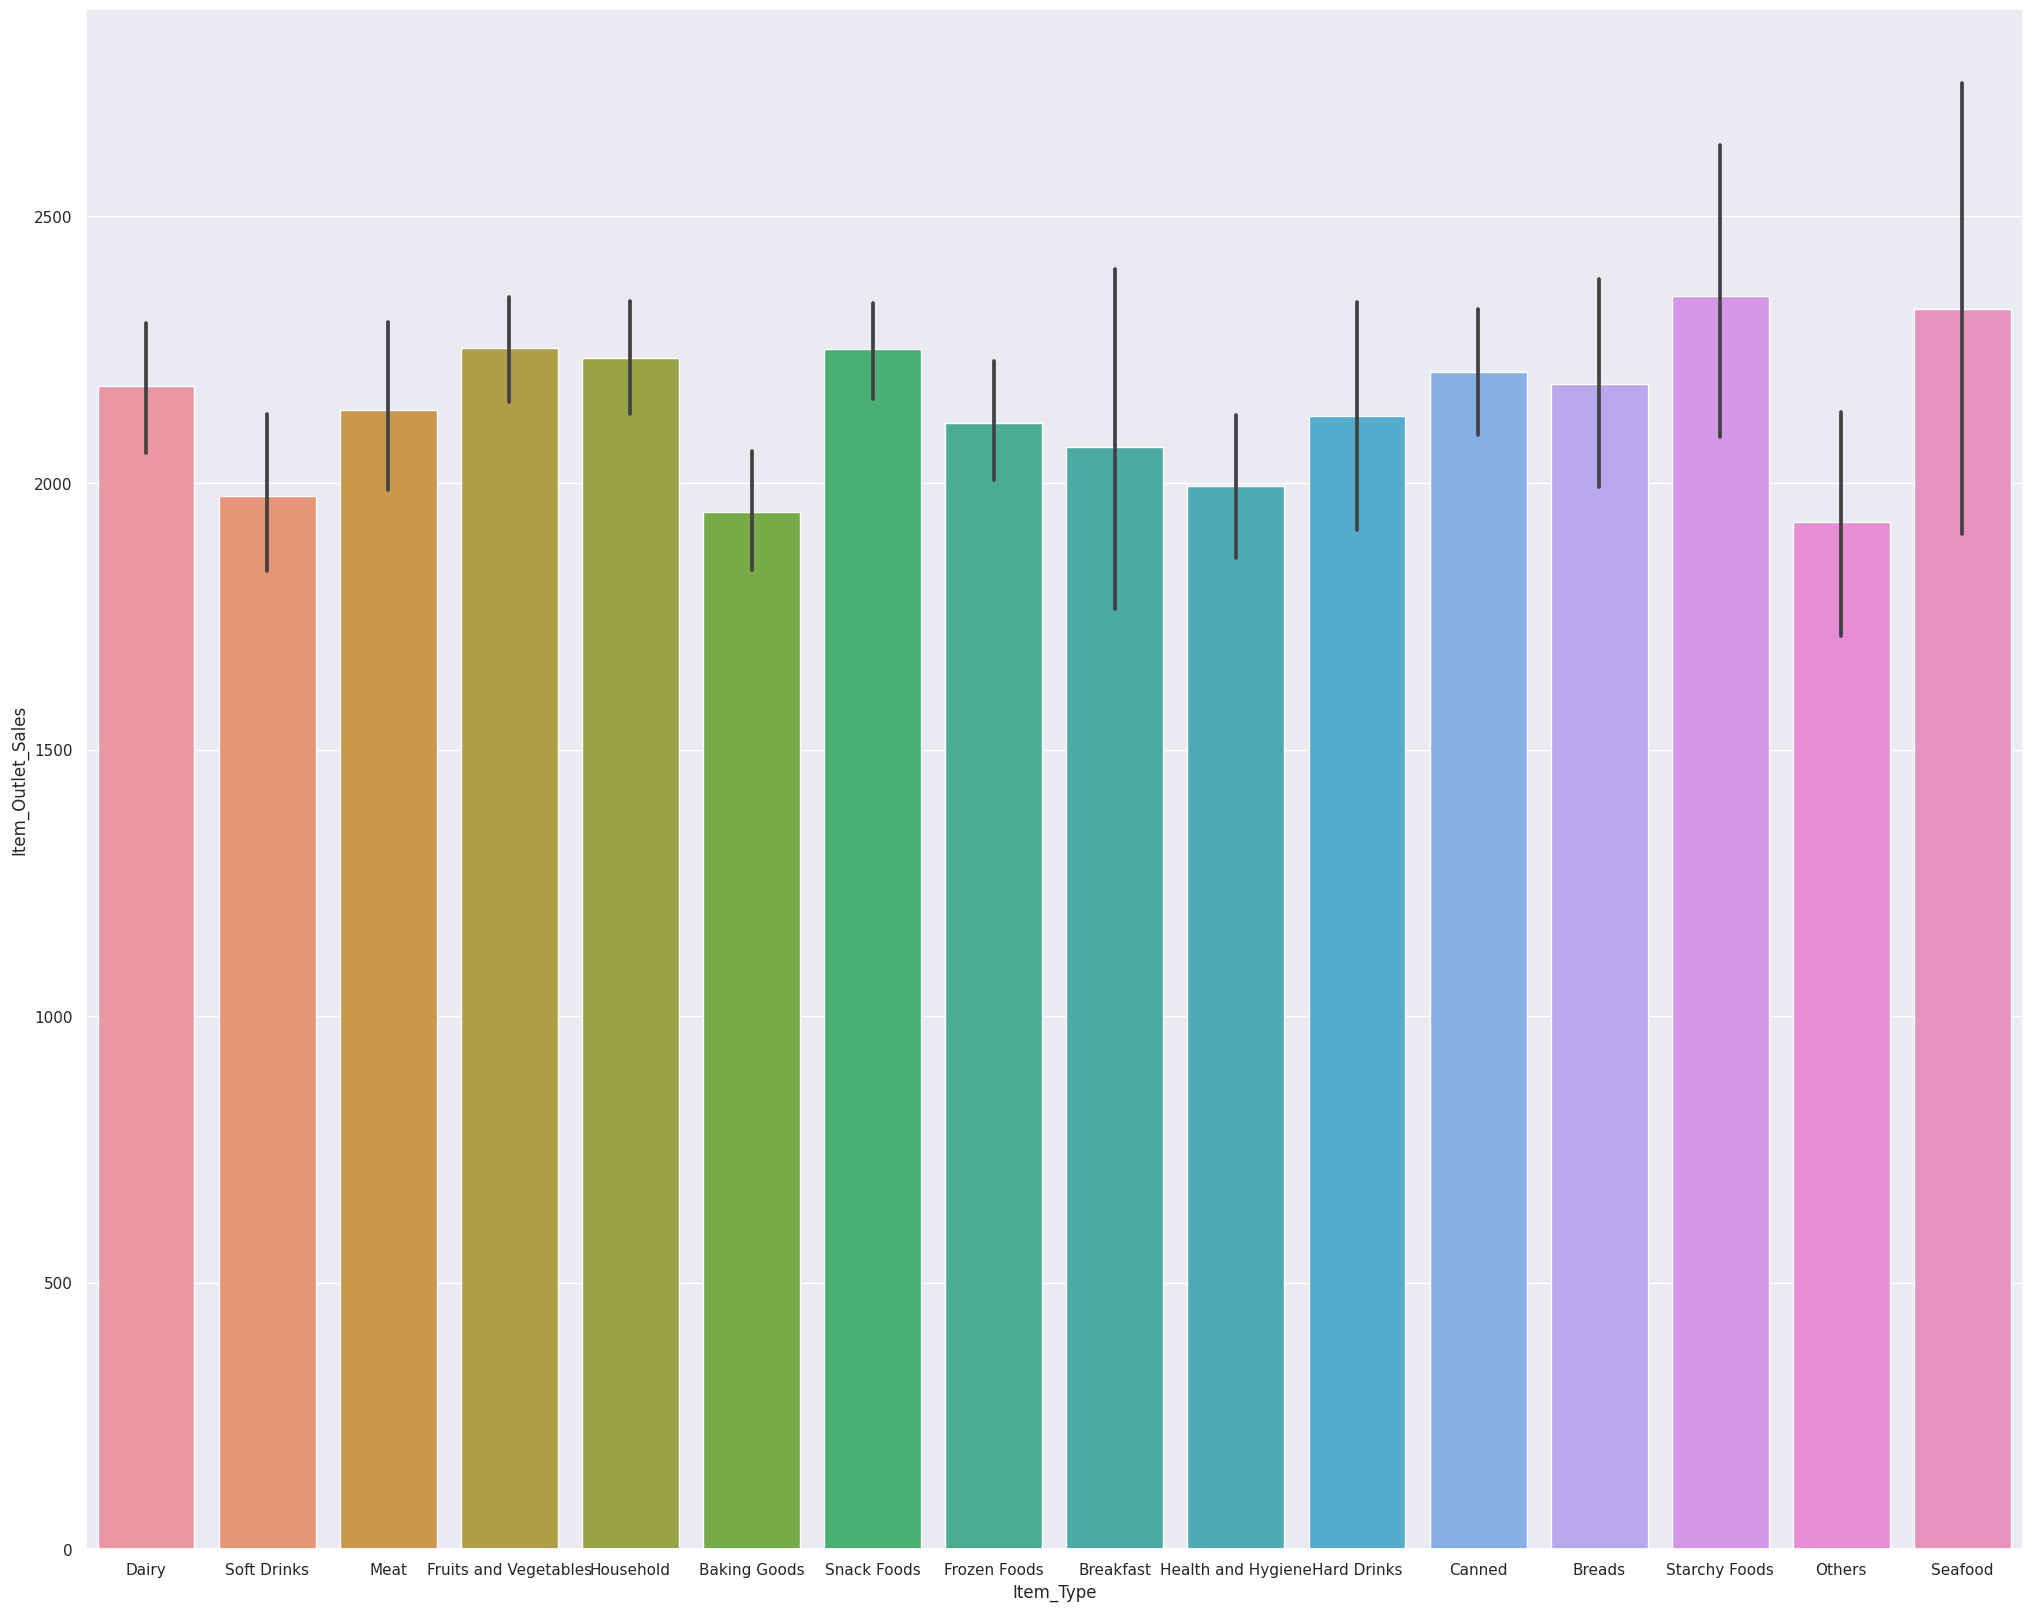

In [83]:
sns.set(rc={'figure.figsize':(25,20)})
sns.barplot(x = 'Item_Type',y = 'Item_Outlet_Sales',data = df)

plt.show()

This shows that starchy foods make highest sales followed by seafood, although both of them are from the least found items in the data, so this means they make very high sales but not due to their frequency(it could be their high cost).

---



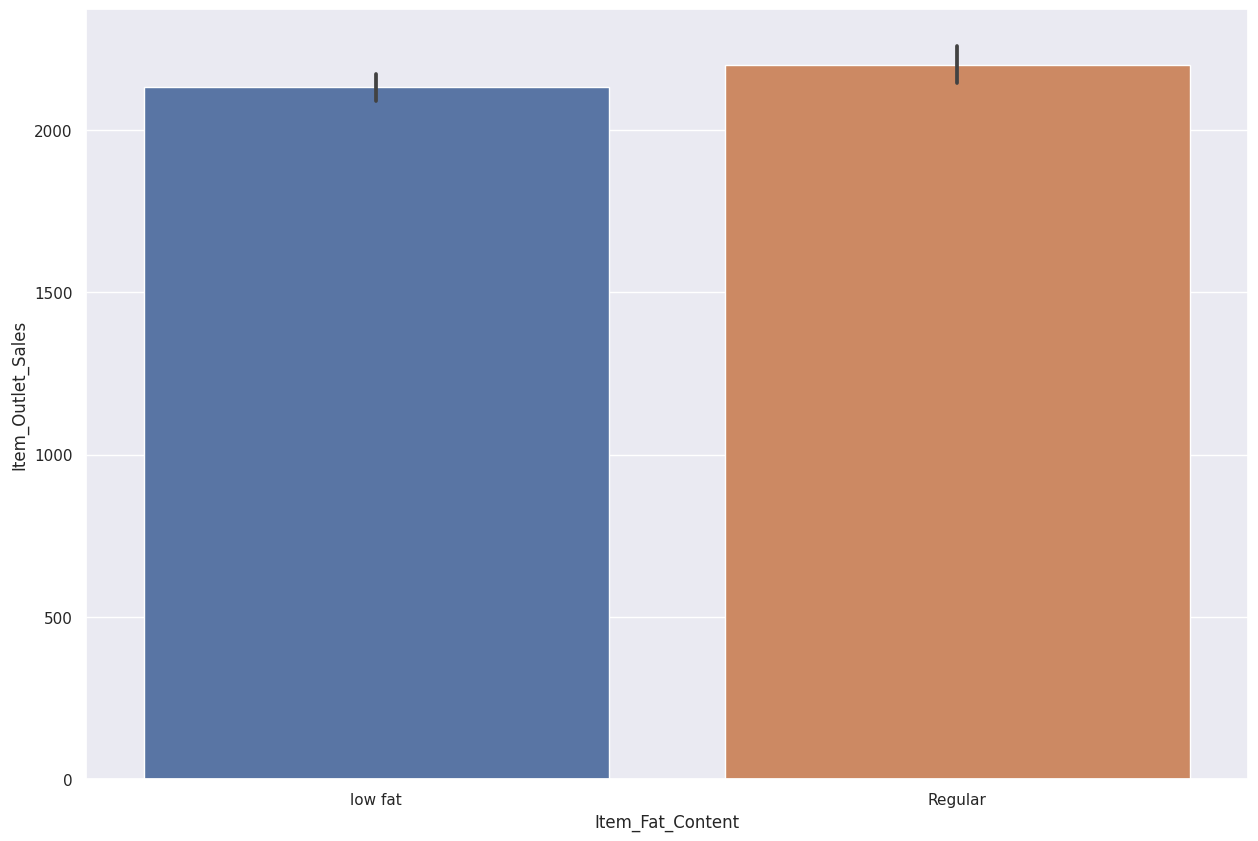

In [84]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = df)
plt.show()

This shows that regular fat items have higher sales than low fat items although low fat items were way more than the regular fat items in the dataset, this indicates the same thing that happened in the item type.

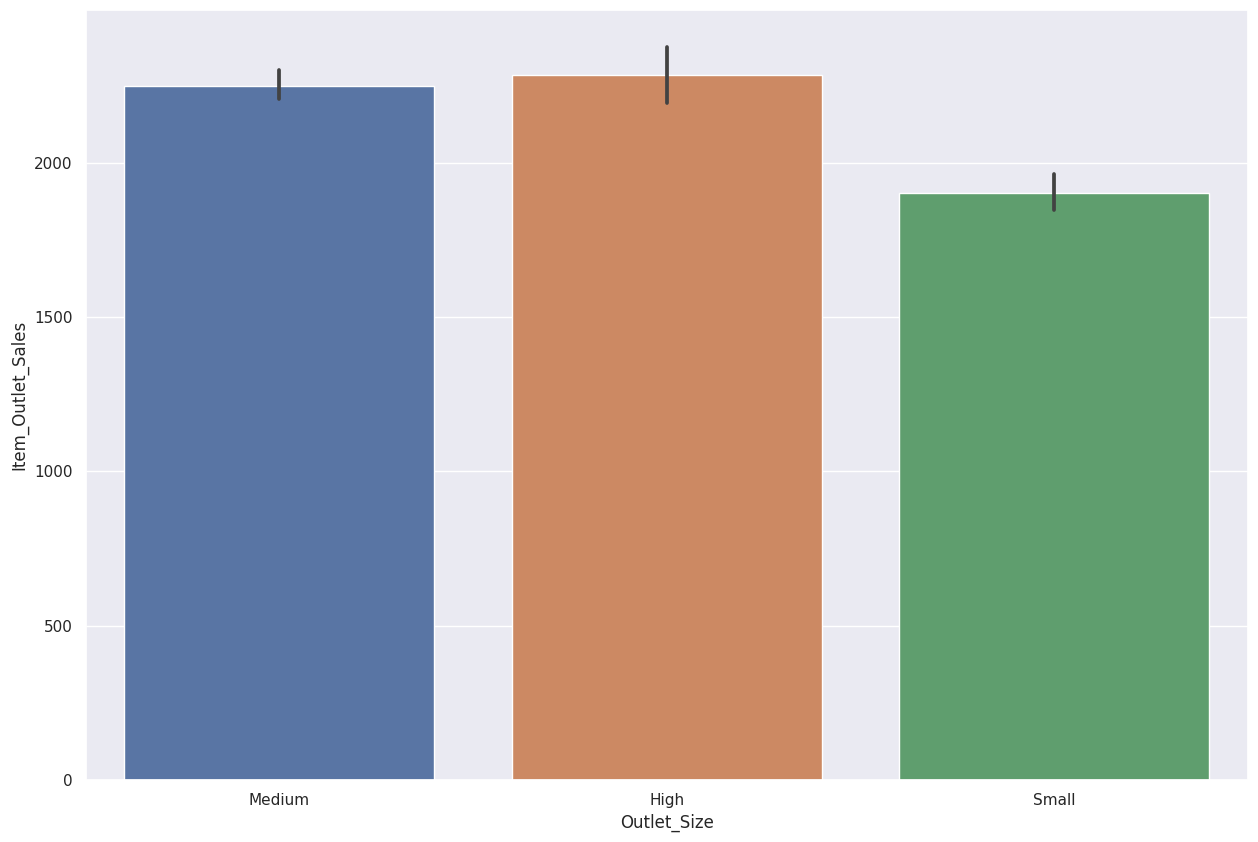

In [85]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',data = df)
plt.show()

The bar plot shows that sales are higher in high and medium outlets and lower in small outlets(as assumed in the hypothesis).

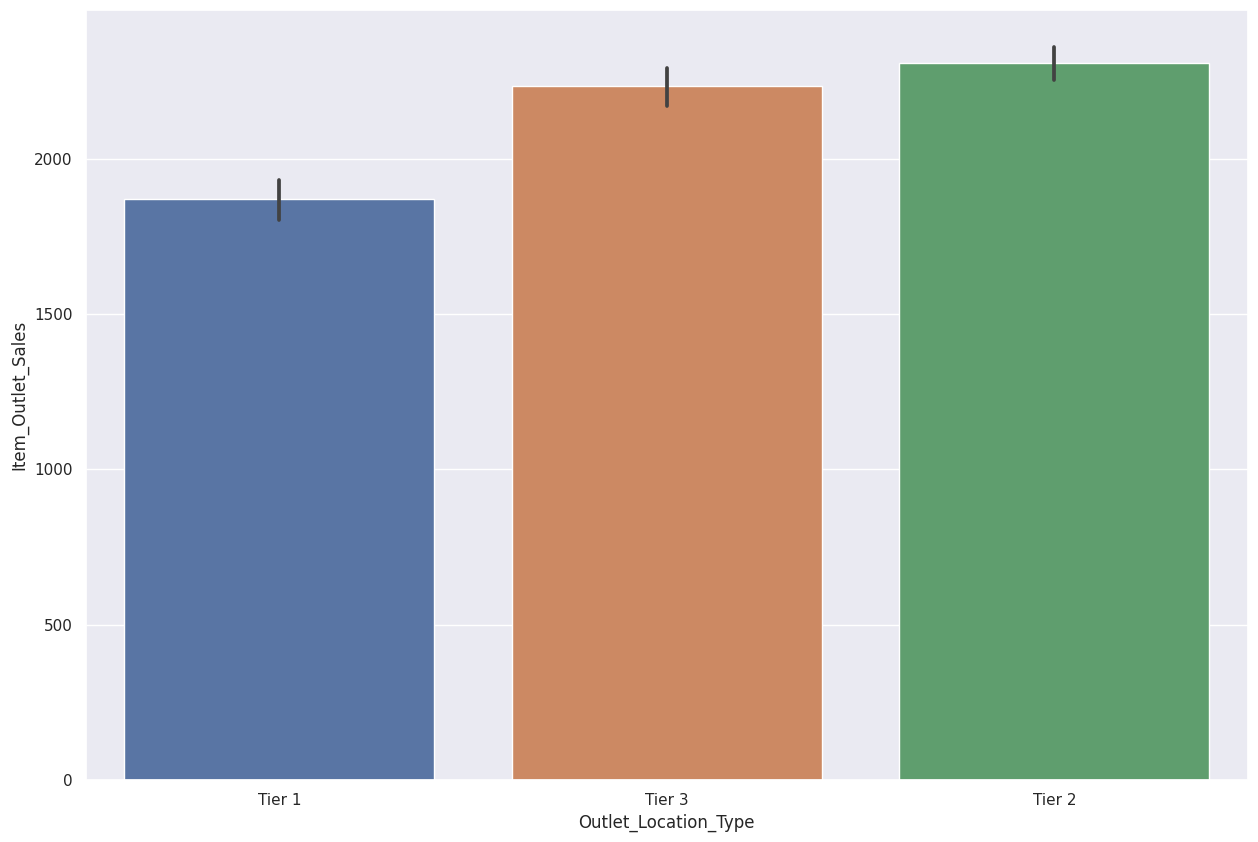

In [86]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = df)
plt.show()

The previous plot shows that highest sales are in Tier 2 cities(medium developed markets)

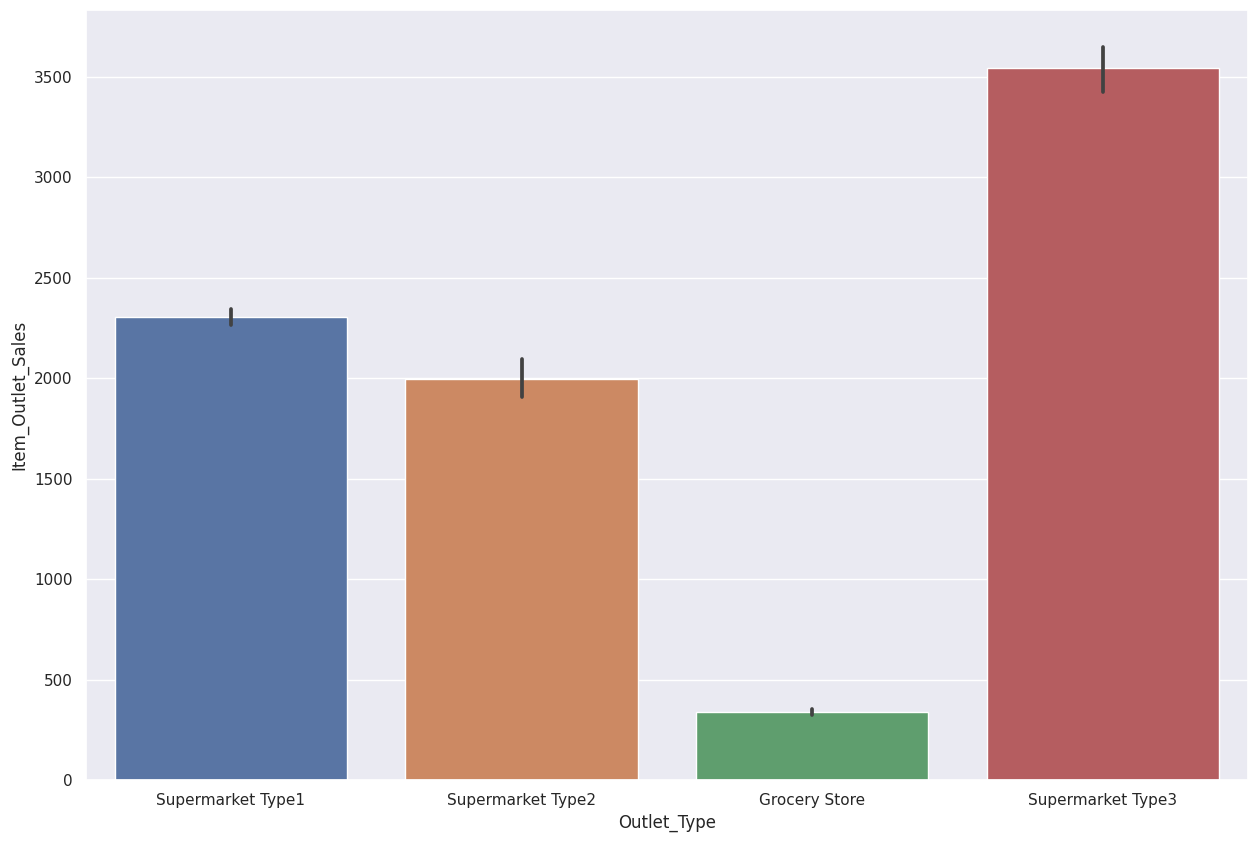

In [87]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales',data = df)
plt.show()

The previous plot shows that supermarket type 3 has reached the highest sales upon the outlet types, and that grocery store has the least sales.
so we can conclude that the grocery store not as important as the supermarket.

#**Conclusion on the analysis**

So, after the analysis we can conclude that the item MRP has the highest effect on the sales, also the remaining features have effect but not as much as MRP,
so, we can drop some unnecessarily columns such as item id, outlet id, item weight.

#**Feature Engineering**

##Feature Selection

In [88]:
#dropping unnecessarily columns
df.drop(['Item_Identifier', 'Outlet_Identifier','Item_Weight'], axis=1, inplace = True)

In [89]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,low fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,low fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


##Encoding

We need to convert categorical data into numerical to make it easier for the model to understand.

We will use label(ordinal) encoding to encode ordinal data as Item_fat_content , outlet_size and outlet_location_type, and we will use one hot encoding for nominal data as item_type and outlet_type, but because there is a lot of categories in item type, we will use frequency encoding instead of one hot encoding.

In [90]:
#Encoding ordinal data
label_encoder = preprocessing.LabelEncoder()
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [91]:
#Encoding nominal data
# grouping by frequency
fq = df.groupby('Item_Type').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('Item_Type')] = df['Item_Type'].map(fq)
# drop original column.
df = df.drop(['Item_Type'], axis=1)

In [92]:
#Encoding nominal data
df = pd.get_dummies(df, columns = ['Outlet_Type'])

In [93]:
#looking at the data after encoding
df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_freq_encode,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,3735.1380,0.080019,0,1,0,0
1,0,0.019278,48.2692,2009,1,2,443.4228,0.052212,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,2097.2700,0.049865,0,1,0,0
3,0,0.000000,182.0950,1998,1,2,732.3800,0.144550,1,0,0,0
4,1,0.000000,53.8614,1987,0,2,994.7052,0.106770,0,1,0,0


#**Scaling**

Now we need to make our features in the same scale to make the predictions of

the model accurate.

In [94]:
# copy the data
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
df = df_min_max_scaled.copy()
df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_freq_encode,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.081883,0.927507,0.583333,0.5,0.0,0.572281,0.529110,0.0,1.0,0.0,0.0
1,0.0,0.098369,0.072068,1.000000,0.5,1.0,0.063404,0.326199,0.0,0.0,1.0,0.0
2,1.0,0.085520,0.468288,0.583333,0.5,0.0,0.319078,0.309075,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.640093,0.541667,0.5,1.0,0.108075,1.000000,1.0,0.0,0.0,0.0
4,1.0,0.000000,0.095805,0.083333,0.0,1.0,0.148628,0.724315,0.0,1.0,0.0,0.0


#**Splitting data**



In [95]:
#splitting data into x and y
y=df["Item_Outlet_Sales"]
x=df.drop("Item_Outlet_Sales", axis=1)

In [96]:
#splitting data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

#**Modeling**

##Linear Regression

In [105]:
#creating and fitting the model
linear_model = LinearRegression().fit(x_train,y_train)
r_sq = linear_model.score(x_test, y_test)
predictions = linear_model.predict(x_test)
print("Mean Absolute Error: " + str(MAE(predictions, y_test)))
print(f"coefficient of determination: {r_sq}")

Mean Absolute Error: 0.1224868234409218
coefficient of determination: 0.5776720973107583


##Random Forest

In [98]:
forest_model = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
forest_model.fit(x_train, y_train)
melb_preds = forest_model.predict(x_test)
print(MAE(y_test, melb_preds))
r_sq = forest_model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")

0.10975774505052478
coefficient of determination: 0.6188897626373713


##XGboost

In [99]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4, random_state = 0)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)],verbose=False)
predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(MAE(predictions, y_test)))
r_sq = my_model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 0.11114406738004666
coefficient of determination: 0.613374830406454


##Lasso

In [101]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

# Evaluate model performance on test set
y_predict = lasso.predict(x_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")

 Mean Absolute Error: 0.2

 Mean Squared Error: 0.06



#**Summary**

We've done preprocessing, analysis, feature engineering and modeling on bigMart data whick includes some features of stores and items, to predict the sales of specific store for a specific item.We used machine learning models as linear regression, Lasso, random forest and XGboost.
The mean squared error of each model:

1) Linear Regression -> 0.12

2) Random forset -> 0.10

3) XGboost -> 0.11

4) Lasso -> 0.06